<a href="https://colab.research.google.com/github/plaban1981/TOPIC_Modeling_NLP/blob/main/Topic_Modelling_With_LDA_and_TextHero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

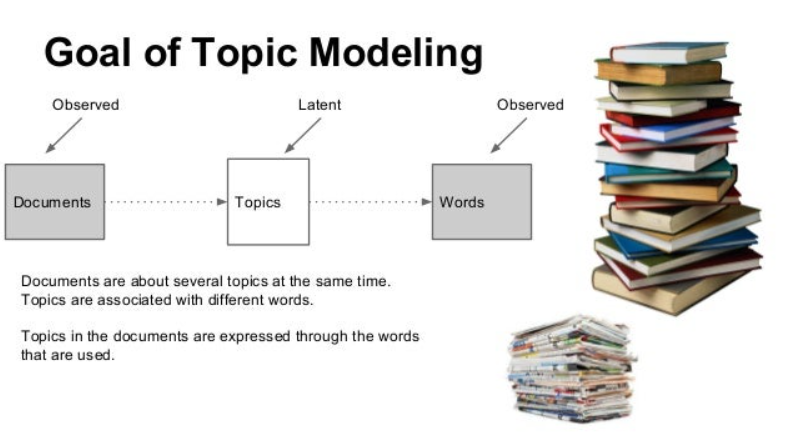

In NLP (Natural Language Processing), **topic modelling** refers to the task of using unsupervised learning to extract main topics that occur in a collection of documents. 

It is frequently used in text mining for discovering hidden semantic structures in a text body.

## Topic Modelling 

Topic Modeling is similar to dividing a bookstore based on the content of the books as it refers to the process of discovering themes in a text corpus and annotating the documents based on the identified topics.


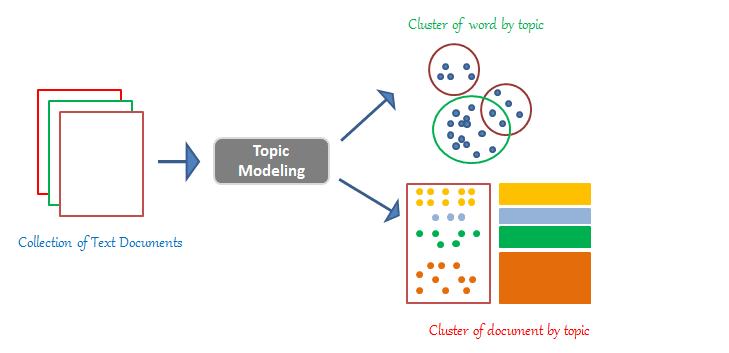

## Latent Dirichlet Allocation (LDA) :

The most commonly used algorithm in topic modelling is LDA **(Latent Dirichlet Allocation)**. 
The goal of LDA is to map all documents to the topics in such a way that the keywords in each document are mostly captured by those topics.

* Latent Dirichlet Allocation is one of the unsupervised ways to implement Topic Modelling. 

* It is a generative probabilistic model in which each document is assumed to be consisting of a different proportion of topics.

* **Latent:** This refers to everything that we don’t know a priori and are hidden in the data. Here, the themes or topics that document consists of are unknown, but they are believed to be present as the text is generated based on those topics.

* **Dirichlet:** In the context of topic modeling  the Dirichlet is the distribution of topics in documents and distribution of words in the topic.

* **Allocation:** This means that once we have Dirichlet, we will allocate topics to the documents and words of the document to topics.

## How does the LDA algorithm work?
The following steps are carried out in LDA to assign topics to each of the documents:

1) For each document, randomly initialize each word to a topic amongst the K topics where K is the number of pre-defined topics.

2)  For each document d:

      For each word w in the document, compute:

        * P(topic t| document d): Proportion of words in document d that are assigned to topic t
        * P(word w| topic t): Proportion of assignments to topic t across all documents from words that come from w

3) Reassign topic T’ to word w with probability **p(t’|d)*p(w|t’)** considering all other words and their topic assignments

what **LDA** says is that each word in each document comes from a topic and the topic is selected from a per-document distribution over topics. 

So we have two matrices:
* 1.  ϴtd = P(t|d) which is the probability distribution of topics in documents
* 2. Фwt =P(w|t) which is the probability distribution of words in topics

And, we can say that the probability of a word given document i.e. P(w|d) is equal to:


the probability of a word given document i.e. P(w|d) is equal to:
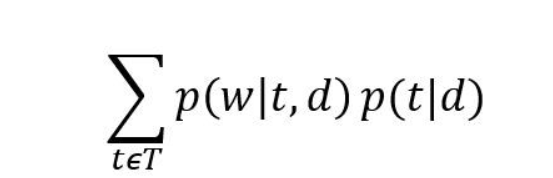

where T is the total number of topics. Also, let’s assume that there is W number of words in our vocabulary for all the documents.
If we assume conditional independence, we can say that
**P(w|t,d) = P(w|t)**
And hence P(w|d) is equal to:

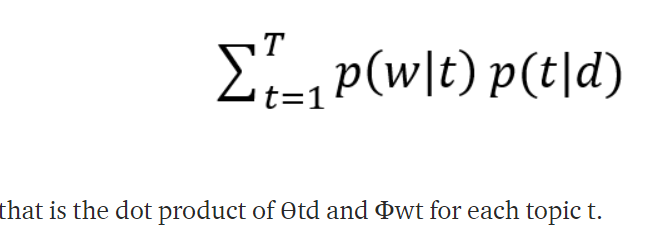


* We can think of LDA similar to that of matrix factorization or SVD, where we decompose the probability distribution matrix of word in document in two matrices consisting of 
1. distribution of topic in a document and 
2. distribution of words in a topic.

## Topic Modelling using LDA in Python:
Data : the ‘Amazon Fine Food Reviews’ data from Kaggle (https://www.kaggle.com/snap/amazon-fine-food-reviews) 

* In traditional LDA, we need to preprocess our text using count vectorization, which is also available in sklearn. 

* After CountVectorizer, texts will be converted to a matrix which contains all the token counts (term frequency). 

* One thing to note is that tf-idf vectorizer,  works poorly in use cases like topic modelling where the similarity between the words matters.

* LDA is a probabilistic model that tries to estimate probability distributions for topics in documents and words in topics. The weighting of TF-IDF is not necessary for this.

* After preprocessing, the matrix can then be fed into the LDA model. 

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"c587f0d6cf361f7851564bf59eca62d7"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-20 07:51:04           9514  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5784  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2133  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2452  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

100% 241M/242M [00:04<00:00, 60.6MB/s]
100% 242M/242M [00:04<00:00, 55.5MB/s]


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! unzip "/content/archive (1).zip" -d "/content/drive/MyDrive/Learn_NLP"

Archive:  /content/archive (1).zip
  inflating: /content/drive/MyDrive/Learn_NLP/Reviews.csv  
  inflating: /content/drive/MyDrive/Learn_NLP/database.sqlite  
  inflating: /content/drive/MyDrive/Learn_NLP/hashes.txt  


In [ ]:
!pip install --quiet texthero

     |████████████████████████████████| 235 kB 5.9 MB/s 
     |████████████████████████████████| 1.5 MB 82.0 MB/s 
     |████████████████████████████████| 749 kB 73.3 MB/s 


In [ ]:
import texthero as hero
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
#
%matplotlib inline

In [ ]:
import pandas as pd
rev = pd.read_csv("/content/drive/MyDrive/Learn_NLP/Reviews.csv")
rev.head()

Id  ...                                               Text
0   1  ...  I have bought several of the Vitality canned d...
1   2  ...  Product arrived labeled as Jumbo Salted Peanut...
2   3  ...  This is a confection that has been around a fe...
3   4  ...  If you are looking for the secret ingredient i...
4   5  ...  Great taffy at a great price.  There was a wid...

[5 rows x 10 columns]

In [ ]:
rev.shape

(568454, 10)

## Pre-processing the text using texthero

The default pipeline for the clean method is the following:

* fillna(s) Replace not assigned values with empty spaces.
* lowercase(s) Lowercase all text.
remove_digits() Remove all blocks of digits.
* remove_punctuation() Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
* remove_diacritics() Remove all accents from strings.
* remove_stopwords() Remove all stop words.
* remove_whitespace() Remove all white space between words.

In [ ]:
rev['clean_text'] = hero.clean(rev['Text'])

In [ ]:
rev[['Text','clean_text']].head()

Text                                         clean_text
0  I have bought several of the Vitality canned d...  bought several vitality canned dog food produc...
1  Product arrived labeled as Jumbo Salted Peanut...  product arrived labeled jumbo salted peanuts p...
2  This is a confection that has been around a fe...  confection around centuries light pillowy citr...
3  If you are looking for the secret ingredient i...  looking secret ingredient robitussin believe f...
4  Great taffy at a great price.  There was a wid...  great taffy great price wide assortment yummy ...

## Count Vectorizer

In [ ]:
vect = CountVectorizer(stop_words='english',max_features=1000)
count_vect = vect.fit_transform(rev['clean_text'])

In [ ]:
CV_document_matrix = count_vect.toarray()

In [ ]:
CV_document_matrix.shape

(568454, 1000)

In [ ]:
count_vect_feature_names = vect.get_feature_names_out().tolist()

In [ ]:
print(count_vect_feature_names)

['able', 'absolutely', 'acid', 'actual', 'actually', 'add', 'added', 'adding', 'addition', 'adds', 'adult', 'afternoon', 'aftertaste', 'ago', 'agree', 'air', 'allergic', 'allergies', 'almond', 'almonds', 'alternative', 'amazing', 'amazon', 'american', 'anymore', 'apple', 'area', 'aroma', 'arrived', 'artificial', 'ask', 'asked', 'ate', 'available', 'average', 'avoid', 'away', 'awesome', 'awful', 'baby', 'bad', 'bag', 'bags', 'baked', 'baking', 'balance', 'ball', 'banana', 'bar', 'bars', 'based', 'basically', 'batch', 'bbq', 'bean', 'beans', 'beat', 'bed', 'beef', 'believe', 'benefits', 'berry', 'best', 'better', 'beverage', 'big', 'bigger', 'bit', 'bite', 'bits', 'bitter', 'bitterness', 'black', 'bland', 'blend', 'blends', 'blood', 'blue', 'blueberry', 'body', 'bold', 'bone', 'bones', 'boost', 'bottle', 'bottles', 'bought', 'bowl', 'box', 'boxes', 'br', 'brand', 'brands', 'bread', 'break', 'breakfast', 'breath', 'brew', 'brewed', 'brewing', 'bring', 'broken', 'brought', 'brown', 'bulk',

In [ ]:
count_vect_df = pd.DataFrame(CV_document_matrix,columns=count_vect_feature_names)
count_vect_df.head()

able  absolutely  acid  actual  actually  ...  yellow  yes  yogurt  yum  yummy
0     0           0     0       0         0  ...       0    0       0    0      0
1     0           0     0       0         1  ...       0    0       0    0      0
2     0           0     0       0         0  ...       0    0       0    0      1
3     0           0     0       0         0  ...       0    0       0    0      0
4     0           0     0       0         0  ...       0    0       0    0      1

[5 rows x 1000 columns]

##TFIDF vectorization on the cleaned text column

* TFIDF refers to Term Frequency Inverse Document Frequency – as this vectorization compares the number of times a word appears in a document with the number of documents that contain the word.

* TFIDF vectorization on the text column gives us a document term matrix on which we can carry out the topic modelling.


In [ ]:
tfidf_output = hero.tfidf(rev['clean_text'],max_features=100,return_feature_names=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
print(tfidf_output[1])

['add', 'also', 'always', 'amazon', 'back', 'bag', 'best', 'better', 'bit', 'bought', 'box', 'br', 'brand', 'buy', 'cat', 'chips', 'chocolate', 'coffee', 'could', 'cup', 'day', 'delicious', 'different', 'dog', 'dogs', 'drink', 'eat', 'enough', 'even', 'every', 'favorite', 'find', 'first', 'flavor', 'flavors', 'food', 'found', 'free', 'get', 'give', 'go', 'good', 'got', 'great', 'healthy', 'hot', 'however', 'ingredients', 'know', 'less', 'like', 'little', 'lot', 'love', 'loves', 'made', 'make', 'makes', 'many', 'milk', 'mix', 'much', 'never', 'nice', 'one', 'order', 'organic', 'price', 'product', 'quality', 'really', 'recommend', 'right', 'say', 'since', 'small', 'something', 'still', 'store', 'stuff', 'sugar', 'sweet', 'taste', 'tastes', 'tea', 'think', 'time', 'treats', 'tried', 'try', 'two', 'use', 'used', 'want', 'water', 'way', 'well', 'without', 'would', 'years']


In [ ]:
type(tfidf_output[0])

0         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54021427...
1         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                                ...                        
568449    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.49859388...
568450    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
568451    [0.0, 0.14481919430378404, 0.0, 0.0, 0.0, 0.0,...
568452    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3625735806931...
568453    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Length: 568454, dtype: object

In [ ]:
rev['tfidf_clean_text'] = tfidf_output[0]

In [ ]:
rev[['Text','clean_text','tfidf_clean_text']].head()

Text  ...                                   tfidf_clean_text
0  I have bought several of the Vitality canned d...  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54021427...
1  Product arrived labeled as Jumbo Salted Peanut...  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  This is a confection that has been around a fe...  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3  If you are looking for the secret ingredient i...  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4  Great taffy at a great price.  There was a wid...  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[5 rows x 3 columns]

In [ ]:
word_vector = rev['tfidf_clean_text'].values.tolist()

In [ ]:
word_document_matrix = np.array(word_vector)

In [ ]:
word_document_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.14481919, 0.        , ..., 0.18148332, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
word_document_matrix.shape

(568454, 100)

## Visualization
* To visualize the data, we map each point to a two-dimensional representation with PCA. 
* The principal component analysis algorithms returns the combination of attributes that better account the variance in the data.

In [ ]:
rev['pca_tfidf_clean_text'] = hero.pca(rev['tfidf_clean_text'])

In [ ]:
rev.head()

Id  ...                           pca_tfidf_clean_text
0   1  ...   [-0.10873530359178336, -0.18812078876182003]
1   2  ...     [-0.10188536382452373, -0.148507210547543]
2   3  ...     [-0.0963362207020455, -0.0396775561180935]
3   4  ...  [-0.11024942135267986, -0.005952800766952483]
4   5  ...   [-0.17714084362225657, -0.06746180330070009]

[5 rows x 13 columns]

## LDA on the vectorized text:
The parameters that we have given to the LDA model, as shown below, include the number of topics, the learning method (which is the way the algorithm updates the assignments of the topics to the documents), the maximum number of iterations to be carried out and the random state. 

* The parameters that we have given to the LDA model, as shown below, 
  *  the number of topics, the learning method (which is the way the algorithm updates the assignments of the topics to the documents), 
  * the maximum number of iterations to be carried out and the random state.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,
                                    learning_method='online',
                                    random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(CV_document_matrix)# used the document matrix derived from CountVectorizer

## Checking the results

In [ ]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  40.64043054387937 %
Topic  1 :  47.03408108034835 %
Topic  2 :  1.2017888192933253 %
Topic  3 :  1.1890410525610557 %
Topic  4 :  9.934658503917898 %


In [ ]:
print("Document 3: ")
for i,topic in enumerate(lda_top[3]):
  print("Topic ",i,": ",topic*100,"%")

Document 3: 
Topic  0 :  17.38257402098163 %
Topic  1 :  1.7055220835756506 %
Topic  2 :  1.7287111376861464 %
Topic  3 :  15.494123727781833 %
Topic  4 :  63.68906902997473 %


## Analyzing the Topics:

In [ ]:
#vocab = tfidf_output[1]
vocab = count_vect_feature_names

In [ ]:
doc ={}
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     k = []
     for item in sorted_words:
       k.append(item[0])
     print(" ".join(k))
     doc[i] = " ".join(k)

Topic 0: 
like good taste really little use make sugar product better
Topic 1: 
food dog treats love loves dogs eat cat old treat
Topic 2: 
br amazon product price box order store buy time good
Topic 3: 
coffee tea flavor like cup taste drink good great love
Topic 4: 
great taste chocolate love flavor like good chips snack cookies


In [ ]:
doc

{0: 'like good taste really little use make sugar product better',
 1: 'food dog treats love loves dogs eat cat old treat',
 2: 'br amazon product price box order store buy time good',
 3: 'coffee tea flavor like cup taste drink good great love',
 4: 'great taste chocolate love flavor like good chips snack cookies'}

## Analyzing Associted Topics

In [ ]:

print("Document 3: and associated topics")
print(rev.iloc[3]['Text'])
for i,topic in enumerate(lda_top[3]):
  print("Topic ",i,": ",topic*100,"%","associated topics comprises : {",doc[i],"}")

Document 3: and associated topics
If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.
Topic  0 :  17.38257402098163 % associated topics comprises : { like good taste really little use make sugar product better }
Topic  1 :  1.7055220835756506 % associated topics comprises : { food dog treats love loves dogs eat cat old treat }
Topic  2 :  1.7287111376861464 % associated topics comprises : { br amazon product price box order store buy time good }
Topic  3 :  15.494123727781833 % associated topics comprises : { coffee tea flavor like cup taste drink good great love }
Topic  4 :  63.68906902997473 % associated topics comprises : { great taste chocolate love flavor like good chips snack cookies }


In [ ]:
print("Document 4: and associated topics")
print(rev.iloc[4]['Text'])
for i,topic in enumerate(lda_top[4]):
  print("Topic ",i,": ",topic*100,"%","associated topics comprises : {",doc[i],"}")

Document 4: and associated topics
Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.
Topic  0 :  2.248660050172143 % associated topics comprises : { like good taste really little use make sugar product better }
Topic  1 :  2.2426952834762073 % associated topics comprises : { food dog treats love loves dogs eat cat old treat }
Topic  2 :  45.08983108713647 % associated topics comprises : { br amazon product price box order store buy time good }
Topic  3 :  20.175899650889768 % associated topics comprises : { coffee tea flavor like cup taste drink good great love }
Topic  4 :  30.242913928325425 % associated topics comprises : { great taste chocolate love flavor like good chips snack cookies }


* we need to explicitly specify the number of topics before training the model. 

* It’s usually hard to decide the number of topics beforehand. 

* A common practice is to choose a number large enough and perform dimension reduction as needed after training. 

## Topic Modeling with BERT using Top2Vec

**Top2Vec** is an algorithm for topic modeling and semantic search. It uses BERT to create topics.

It automatically detects topics present in text and generates jointly embedded topic, document and word vectors. 

Once you train the Top2Vec model you can:

* Get number of detected topics.
* Get topics.
* Get topic sizes.
* Get hierarchichal topics.
* Search topics by keywords.
* Search documents by topic.
* Search documents by keywords.
* Find similar words.
* Find similar documents.
* Expose model with RESTful-Top2Vec

## Benefits
* Automatically finds number of topics.
* No stop word lists required.
* No need for stemming/lemmatization.
* Works on short text.
* Creates jointly embedded topic, document, and word vectors.
* Has search functions built in.

## Steps
The assumption the Top2vec algorithm makes is that many semantically similar documents are indicative of an underlying topic. 

* The first step is to create a joint embedding of document and word vectors. 
* Once documents and words are embedded in a vector space the goal of the algorithm is to find dense clusters of documents, 

* From the dense clusters identify which words attracted those documents together. 

*  Each dense area is a topic and the words that attracted the documents to the dense area are the topic words.


## Algorithm

1. Create jointly **embedded document and word vectors** using **Doc2Vec** or **Universal Sentence Encoder** or **BERT** Sentence Transformer.  Documents will be placed close to other similar documents and close to the most distinguishing words.

2. Create lower dimensional embedding of document vectors using UMAP.
Document vectors in high dimensional space are very sparse, dimension reduction helps for finding dense areas. Each point is a document vector.

3. Find dense areas of documents using HDBSCAN.

4. For each dense area calculate the centroid of document vectors in original dimension, this is the topic vector.

5. Find n-closest word vectors to the resulting topic vector.



## Install the follwoing dependent libraries and do a restart runtime

In [1]:
pip install numba

In [2]:
!pip install numpy

In [2]:
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0

     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 6.4 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.9 MB 4.3 MB/s 
     |████████████████████████████████| 78 kB 3.1 MB/s 
     |████████████████████████████████| 3.4 MB 23.0 MB/s 
     |████████████████████████████████| 6.8 MB 75.6 MB/s 
     |████████████████████████████████| 1.2 MB 72.5 MB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 3.3 MB 20.5 MB/s 
     |████████████████████████████████| 596 kB 65.2 MB/s 
     |████████████████████████████████| 895 kB 72.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
/bin/bash: 1.0.0: No such file or directory


In [1]:
## Installation
! pip install --quiet top2vec

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
#To install pre-trained universal sentence encoder options:
!pip install --quiet top2vec[sentence_encoders]

In [3]:
##To install pre-trained BERT sentence transformer options:
!pip install --quiet top2vec[sentence_transformers]

In [4]:
#To install indexing options:
!pip install --quiet top2vec[indexing]

In [2]:
import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

In [3]:
rev = pd.read_csv("/content/drive/MyDrive/Learn_NLP/Reviews.csv")
rev.head()

Id  ...                                               Text
0   1  ...  I have bought several of the Vitality canned d...
1   2  ...  Product arrived labeled as Jumbo Salted Peanut...
2   3  ...  This is a confection that has been around a fe...
3   4  ...  If you are looking for the secret ingredient i...
4   5  ...  Great taffy at a great price.  There was a wid...

[5 rows x 10 columns]

In [4]:
rev.shape

(568454, 10)

In [5]:
rev_new = rev.loc[:5000]
rev_new.shape

(5001, 10)

* tried universal-sentence-encoder-multilingual: for only 5000 records as the system was crashing

In [6]:
docs  = list(rev_new['Text'].values)
docs[:5]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

##Top2Vec

#### Important parameters:

* documents: Input corpus, should be a list of strings.

* speed: This parameter will determine how fast the model takes to train. 

    - The **'fast-learn'** option is the fastest and will generate the lowest quality vectors. 
    - The **'learn'** option will learn better quality vectors but take a longer time to train. 
    - The **'deep-learn'** option will learn the best quality vectors but will take significant time to train.

* workers: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

## Pretrained Embedding Models

Pretrained embedding model options for generating joint word and document embeddings

* doc2vec (default)
* universal-sentence-encoder
* universal-sentence-encoder-multilingual
* distiluse-base-multilingual-cased


1. **doc2vec** : For large data sets and data sets with very unique vocabulary doc2vec could produce better results. This will train a doc2vec model from scratch. This method is language agnostic. However multiple languages will not be aligned.

2. **universal-sentence-encoder** :Using the universal sentence encoder options will be much faster since those are pre-trained and efficient models. **The universal sentence encoder options are suggested for smaller data sets**. 

3. **universal-sentence-encoder-multilingual**: They are also **good options for large data sets that are in English or in languages covered by the multilingual model**. It is also suggested for data sets that are multilingual.

4. **distiluse-base-multilingual-cased** :The distiluse-base-multilingual-cased pre-trained sentence transformer is suggested for multilingual datasets and languages that are not covered by the multilingual universal sentence encoder. The transformer is significantly slower than the universal sentence encoder options.

The great advantage of **Doc2Vec** is that the resulting document- and word embeddings are jointly embedding in the same space which allows document embeddings to be represented by nearby word embeddings.

In [7]:
import tensorflow
import tensorflow_hub
import tensorflow_text
tensorflow.__version__

'2.7.0'

In [8]:
np.__version__

'1.21.5'

In [9]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
warnings.warn(problem)

In [10]:
from top2vec import Top2Vec
model = Top2Vec(docs,embedding_model='universal-sentence-encoder-multilingual')
#model = Top2Vec(docs,speed="learn", workers=8)

2022-01-16 03:30:28,881 - top2vec - INFO - Pre-processing documents for training
2022-01-16 03:30:29,843 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
2022-01-16 03:30:33,319 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-01-16 03:30:35,470 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-01-16 03:31:00,083 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-01-16 03:31:00,204 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [11]:
model.get_num_topics()

42

In [12]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [13]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

In [14]:
topic_sizes

array([561, 383, 354, 331, 324, 269, 263, 175, 172, 151, 135, 133, 130,
       117, 113,  93,  86,  83,  74,  73,  72,  72,  71,  68,  62,  52,
        47,  47,  47,  45,  45,  43,  41,  39,  37,  36,  32,  32,  24,
        24,  23,  22])

##Search Topics

In [15]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["amazon"], num_topics=5)

* topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

* word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

* topic_scores: For each topic the cosine similarity to the search keywords will be returned.

* topic_nums: The unique index of every topic will be returned. 

In [23]:
for topic_word, word_score, topic_score,topic_num in zip(topic_words, word_scores, topic_scores, topic_nums):
    print(f"Topic: {topic_num}, Score: {topic_score}")
    print("----------- associated topic words and score -----------")
    for i,word in enumerate(topic_word):
      print(f'Topic Word : {word} : Score {word_score[i]}')
    print("------------------------------------------------------")
    print()

Topic: 5, Score: 0.37956497271709067
----------- associated topic words and score -----------
Topic Word : amazon : Score 0.3795650601387024
Topic Word : ordered : Score 0.3506370782852173
Topic Word : shipped : Score 0.3378528952598572
Topic Word : shipping : Score 0.33758482336997986
Topic Word : delivery : Score 0.29871004819869995
Topic Word : delivered : Score 0.27906492352485657
Topic Word : packaged : Score 0.2712840437889099
Topic Word : arrived : Score 0.2699112594127655
Topic Word : package : Score 0.2554559111595154
Topic Word : purchased : Score 0.2552715539932251
Topic Word : product : Score 0.25239890813827515
Topic Word : order : Score 0.25070667266845703
Topic Word : store : Score 0.24702486395835876
Topic Word : bought : Score 0.2450198531150818
Topic Word : products : Score 0.24361839890480042
Topic Word : packaging : Score 0.24218997359275818
Topic Word : received : Score 0.23936374485492706
Topic Word : cheap : Score 0.23817265033721924
Topic Word : stores : Score 0

## Search Documents by Topic

* We are going to search by topic 40, a topic that appears to be about science.

In [17]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=40, num_docs=5)

## Returns:

* **documents**: The documents in a list, the most similar are first.

* **doc_scores**: Semantic similarity of document to topic. The cosine similarity of the document and topic vector.

* **doc_ids**: Unique ids of documents. If ids were not given, the index of document in the original corpus.

In [18]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=40, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 34, Score: 0.845492959022522
-----------
Instant oatmeal can become soggy the minute the water hits the bowl. McCann's Instant Oatmeal holds its texture, has excellent flavor, and is good for you all at the same time. McCann's regular oat meal is excellent, too, but may take a bit longer to prepare than most have time for in the morning. This is the best instant brand I've ever eaten, and a very close second to the non-instant variety.<br /><br />McCann's Instant Irish Oatmeal, Variety Pack of Regular, Apples & Cinnamon, and Maple & Brown Sugar, 10-Count Boxes (Pack of 6)
-----------

Document: 32, Score: 0.8226909637451172
-----------
McCann's Instant Oatmeal is great if you must have your oatmeal but can only scrape together two or three minutes to prepare it. There is no escaping the fact, however, that even the best instant oatmeal is nowhere near as good as even a store brand of oatmeal requiring stovetop preparation.  Still, the McCann's is as good as it gets for instan

In [19]:
topic_words[0]

array(['amazon', 'ordered', 'shipped', 'shipping', 'delivery',
       'delivered', 'packaged', 'arrived', 'package', 'purchased',
       'product', 'order', 'store', 'bought', 'products', 'packaging',
       'received', 'cheap', 'stores', 'packages', 'ordering', 'grocery',
       'sold', 'price', 'packed', 'priced', 'purchasing', 'cheaper',
       'purchase', 'item', 'delicious', 'good', 'tasted', 'tasty', 'sent',
       'expensive', 'stock', 'flavorful', 'fine', 'wonderful', 'nice',
       'awful', 'gave', 'decent', 'keurig', 'buying', 'items', 'sale',
       'excellent', 'buy'], dtype='<U12')

In [20]:
 word_scores[0]

array([0.37956506, 0.35063708, 0.3378529 , 0.33758482, 0.29871005,
       0.27906492, 0.27128404, 0.26991126, 0.2554559 , 0.25527155,
       0.2523989 , 0.25070667, 0.24702486, 0.24501985, 0.2436184 ,
       0.24218997, 0.23936374, 0.23817265, 0.23758847, 0.23665944,
       0.2360552 , 0.23208757, 0.22927593, 0.22319314, 0.22281876,
       0.22139773, 0.21532577, 0.21332021, 0.21299551, 0.20958555,
       0.20819455, 0.2075955 , 0.20729867, 0.2063424 , 0.20381221,
       0.2028798 , 0.20186548, 0.1990622 , 0.19822764, 0.19608657,
       0.19481686, 0.19418624, 0.19181937, 0.18961832, 0.18707743,
       0.18680882, 0.18619786, 0.18599327, 0.18475118, 0.18474609],
      dtype=float32)

In [21]:
 topic_scores[0]

0.37956497271709067

In [22]:
topic_nums[0]

5

In [ ]:
topic_nums

array([206, 835, 112, 731, 162])

In [ ]:
topic_scores

array([0.41811804, 0.37184151, 0.35775827, 0.33428558, 0.33137066])

* Topic 206 was the most similar topic to thge word "amazon" with a cosine similarity of 0.4181. (Values can be from least similar 0, to most similar 1)

## Generate wordcloud for the first five topics

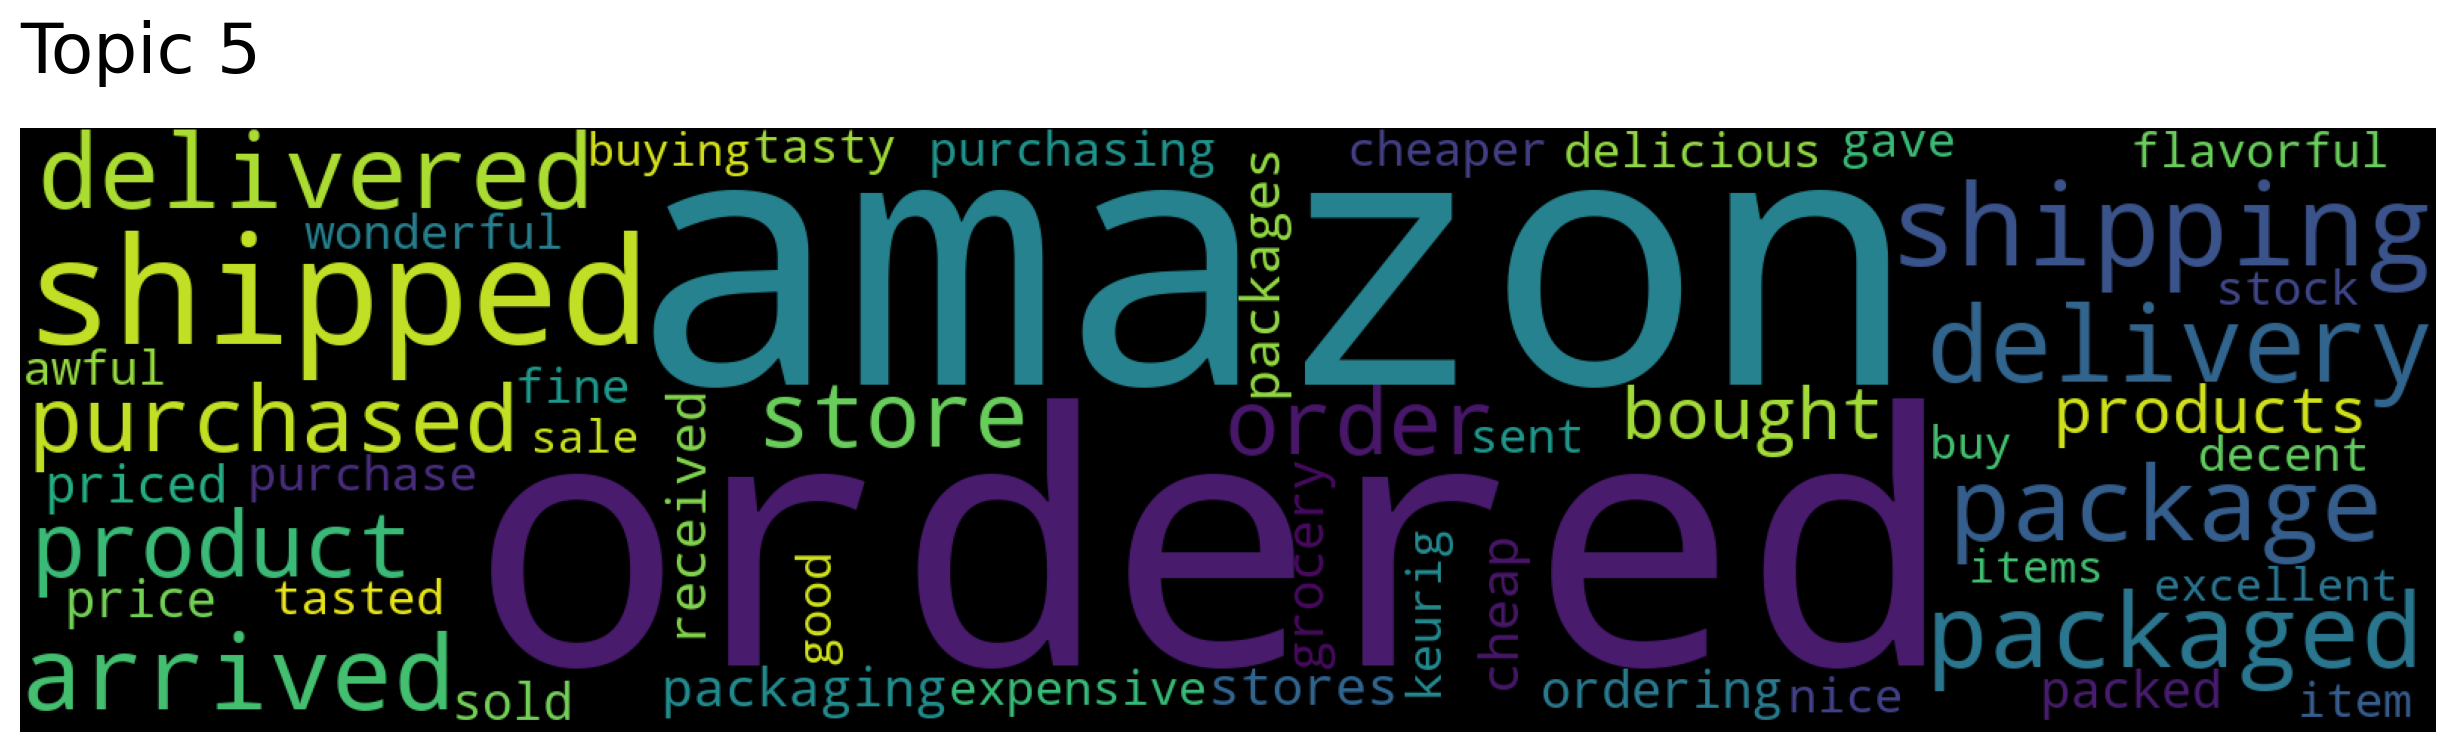

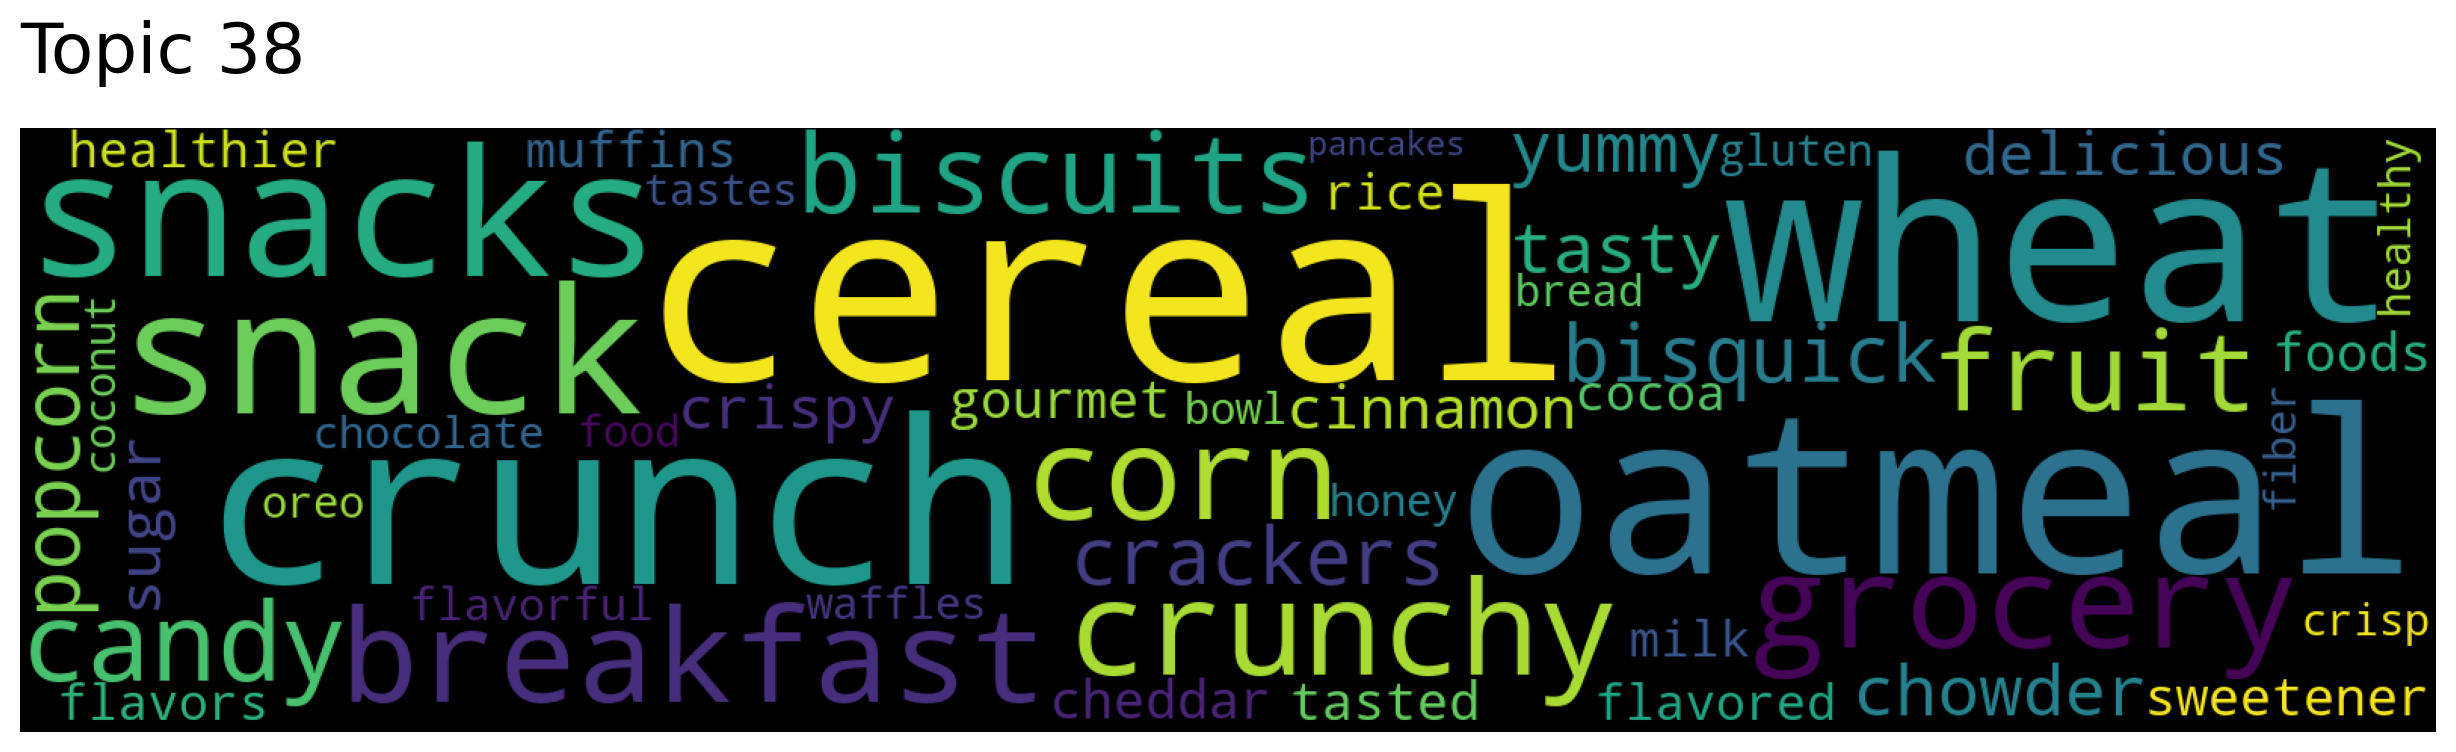

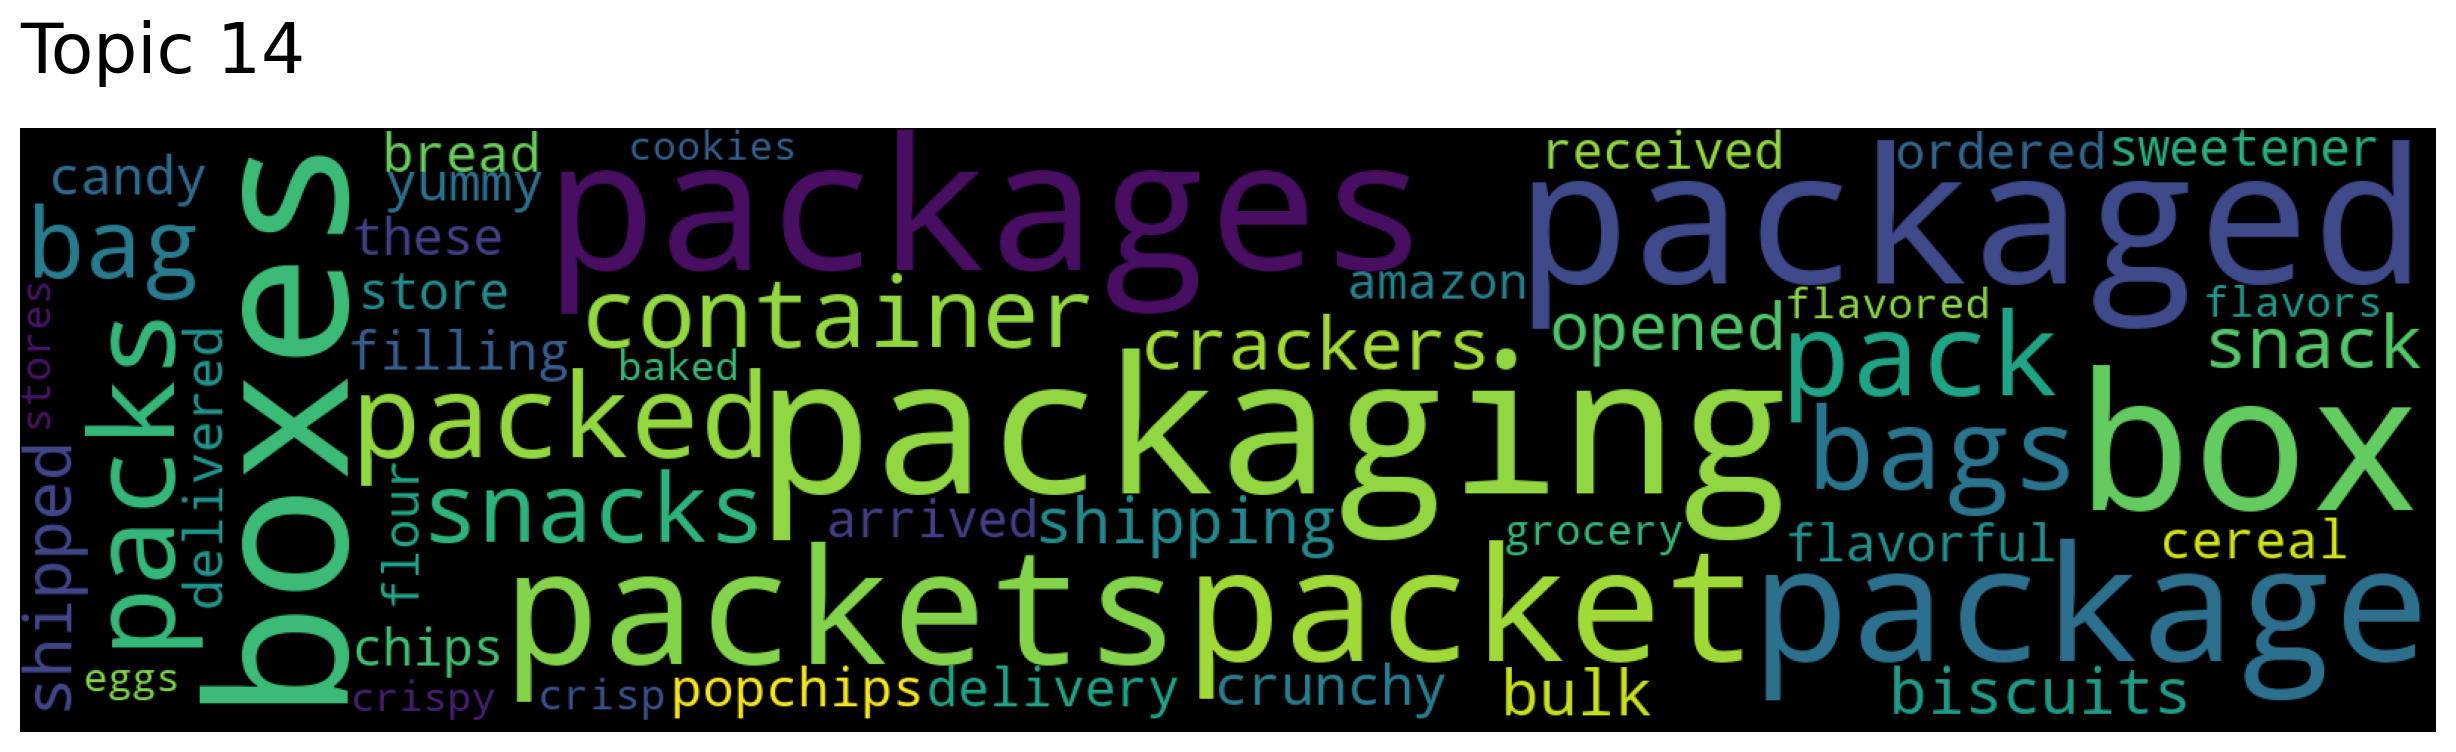

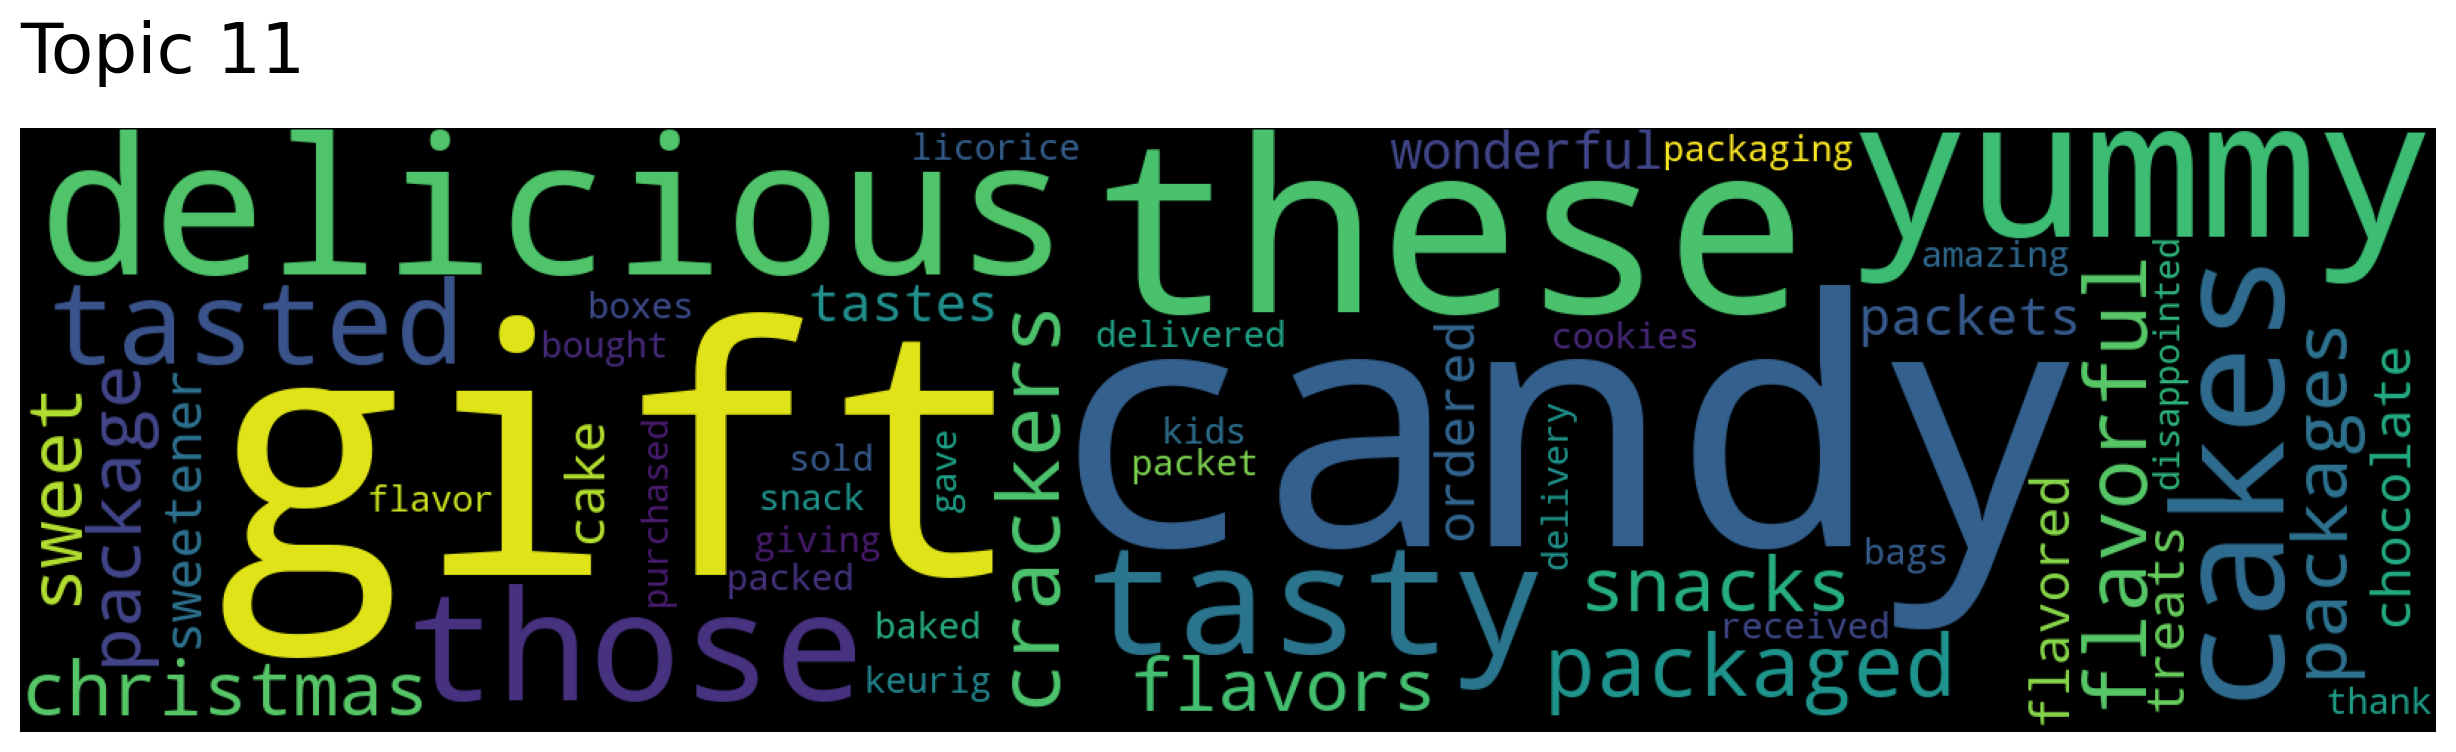

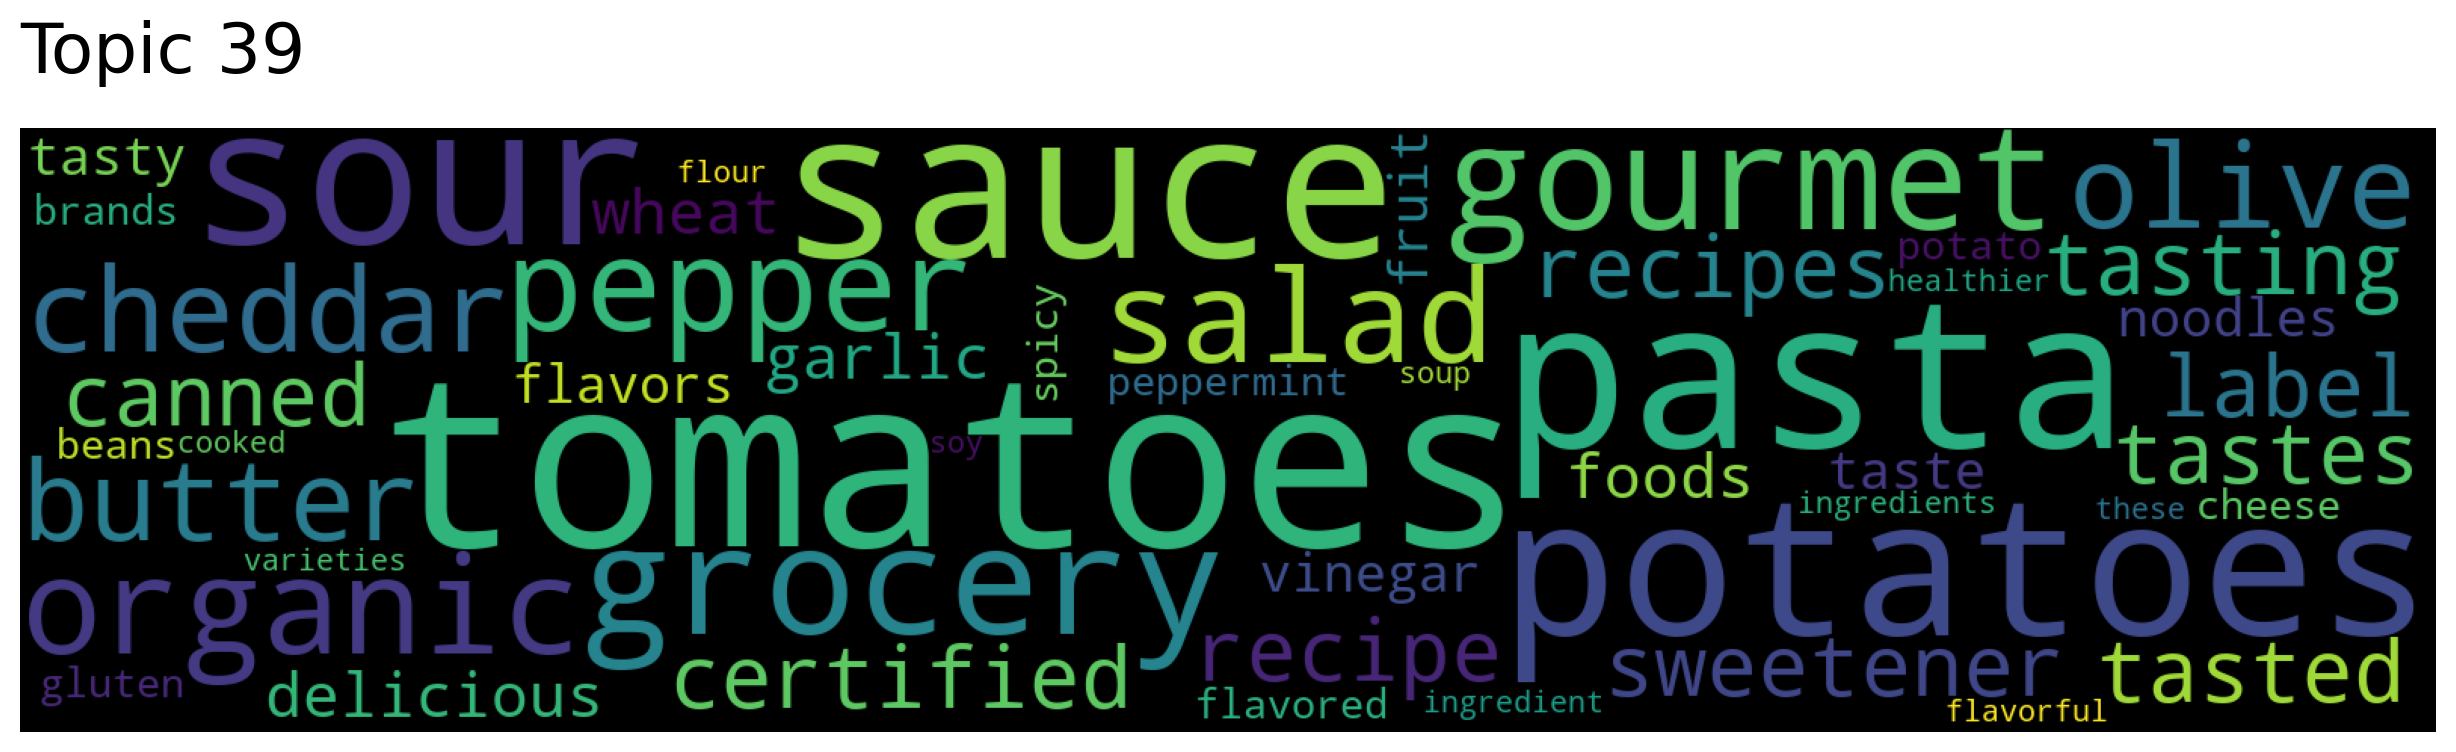

In [24]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["amazon"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

## Top2Vec using model as Doc2Vec

* documents: Input corpus, should be a list of strings.

* speed: This parameter will determine how fast the model takes to train. 

    - The **'fast-learn'** option is the fastest and will generate the lowest quality vectors. 
    - The **'learn'** option will learn better quality vectors but take a longer time to train. 
    - The **'deep-learn'** option will learn the best quality vectors but will take significant time to train.

* workers: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

In [26]:
docs  = list(rev['Text'].values)
docs[:5]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

##speed = learn detected 3 topics

In [34]:
model = Top2Vec(docs,speed="learn", workers=-1)

2022-01-16 04:17:01,578 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-01-16 04:18:42,232 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-01-16 04:20:42,455 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-01-16 04:30:43,062 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-01-16 04:32:40,280 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [35]:
model.get_num_topics()

3

In [37]:
topic_sizes, topic_nums = model.get_topic_sizes()
for topic_nums,topic_sizes in zip(topic_nums,topic_sizes):
  print(f"Topic Number : {topic_nums} Topic Sizes : {topic_sizes}")

Topic Number : 0 Topic Sizes : 190461
Topic Number : 1 Topic Sizes : 190031
Topic Number : 2 Topic Sizes : 187962


In [42]:
for i in range(model.get_num_topics()):
  print(f"Details for Topic {i}")
  print("------------------------------------------------------------------------------")
  documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=i, num_docs=5)
  for doc, score, doc_id in zip(documents, document_scores, document_ids):

    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()
  print("----------------------------------------------------------------------------------")

Details for Topic 0
------------------------------------------------------------------------------
Document: 242284, Score: 0.31971442699432373
-----------
I always look for this brand of bulgar above all others, it just seems to cook up and taste the best. Cook as you would rice--one part bulgar, 2 parts water. It cooks as fast as plain white or brown rice, and in my pressure cooker, done in 6 mins flat. Great for adding to soups, eaten as a side dish, or use in a cold summer salad. Anything you'd make with rice, farro, barley, lentils, beans, etc., you can substitute bulgar just as easily. High in fiber too.
-----------

Document: 304358, Score: 0.30064648389816284
-----------
The taste of extra strength is better than regular 5 hour energy but I still question the ability to give ME more energy. Would recommend if you like energy products.
-----------

Document: 128079, Score: 0.2865159511566162
-----------
Garlic and especially garlic juice can make your dinner a little more exciti

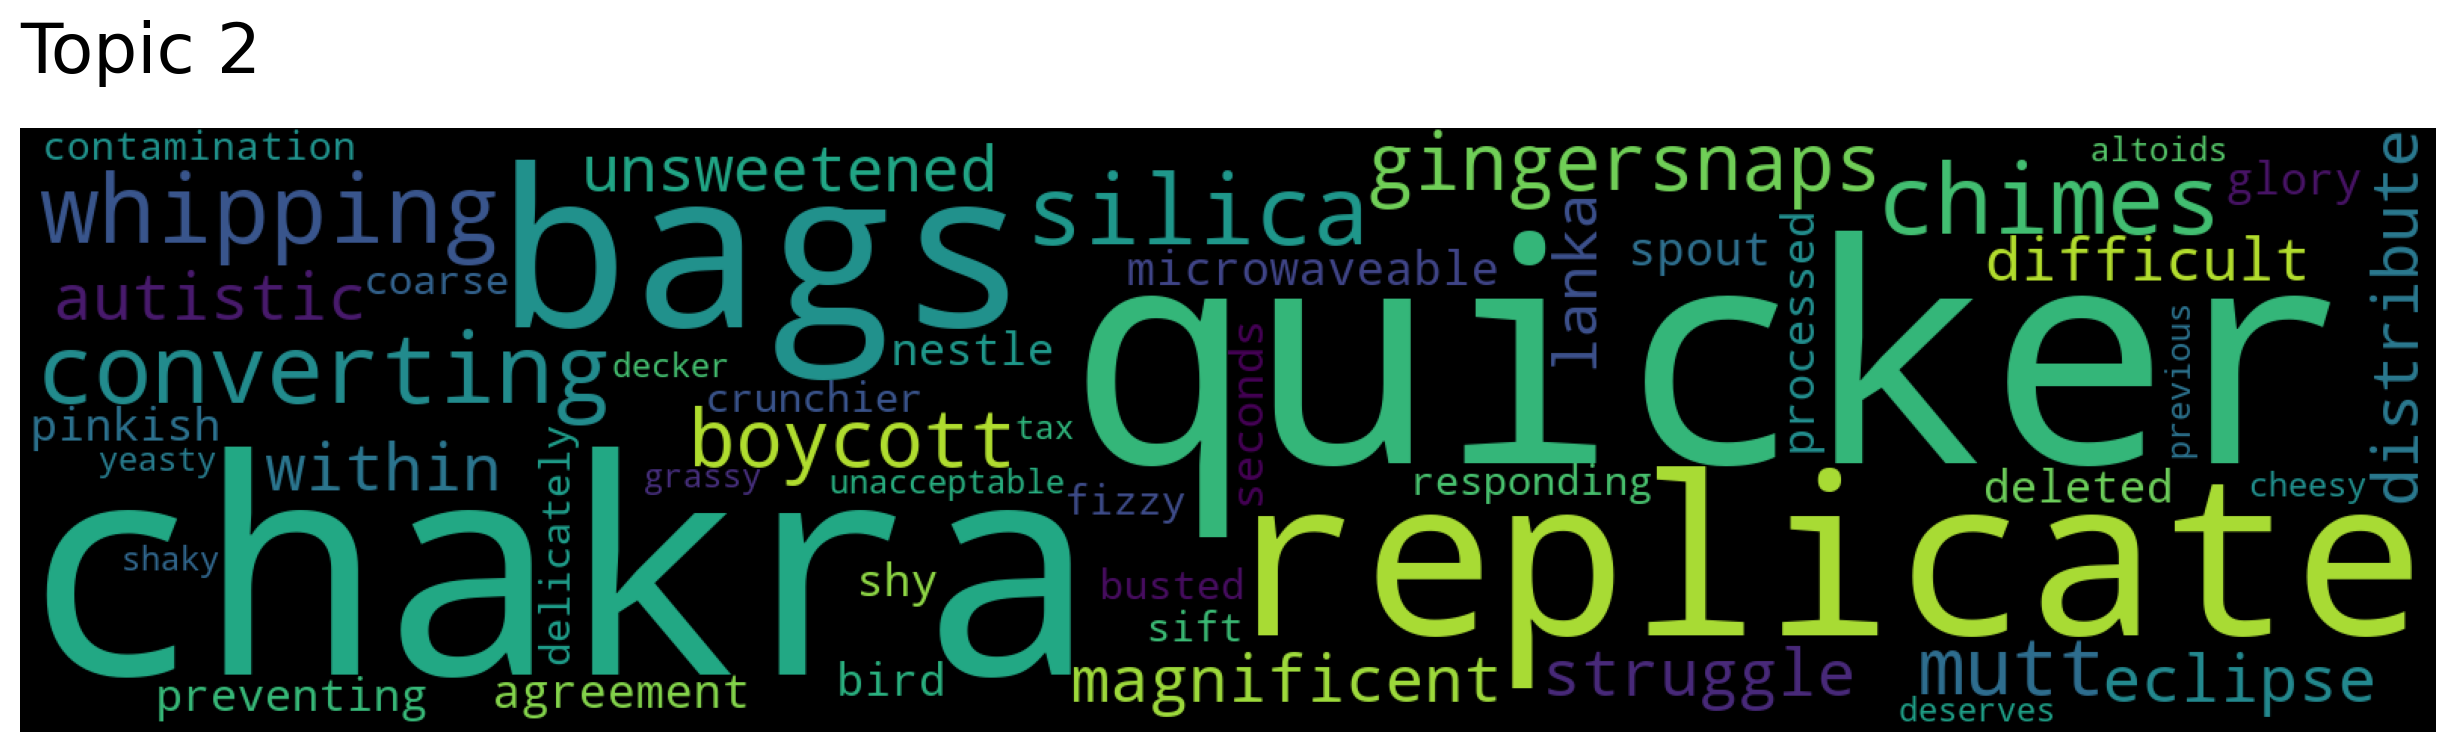

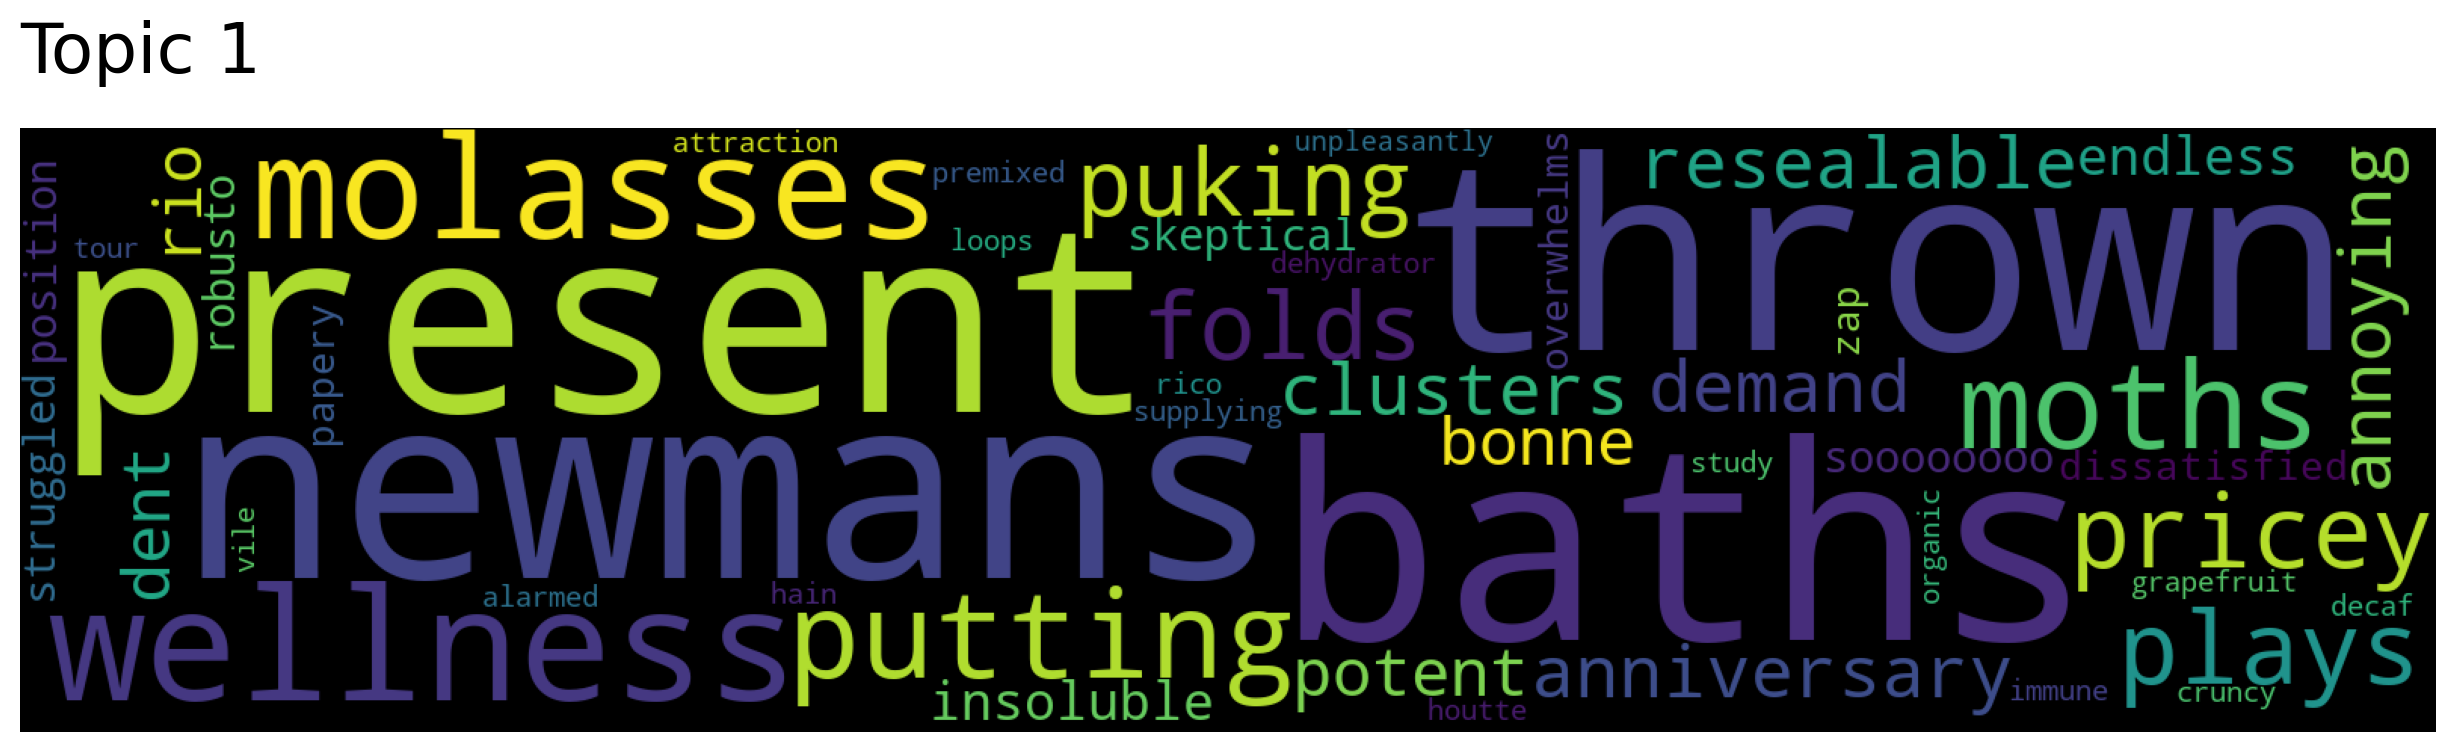

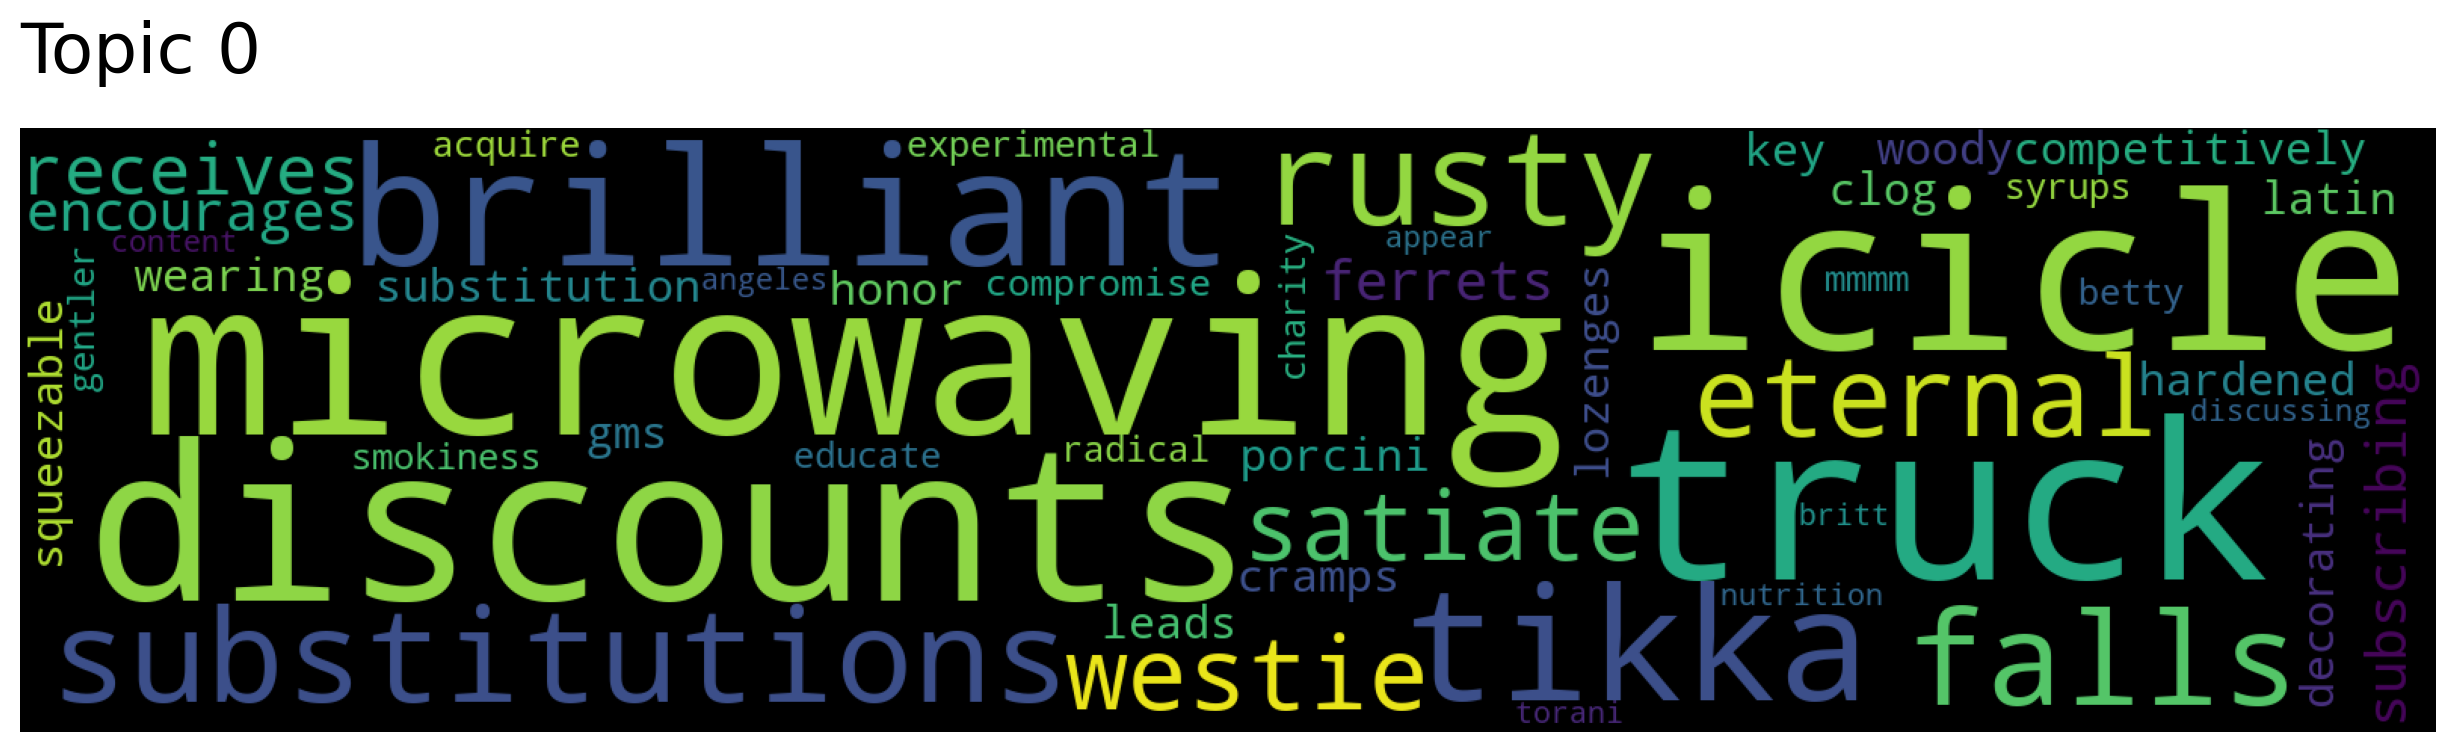

In [44]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["amazon"], num_topics=3)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

## speed = deep-learn detected 2 topics

In [45]:
deep_model = Top2Vec(docs,speed="deep-learn", workers=-1)

2022-01-16 05:11:15,741 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-01-16 05:12:55,882 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-01-16 05:18:12,440 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-01-16 05:28:15,476 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-01-16 05:30:23,803 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [46]:
deep_model.get_num_topics()

3

In [47]:
topic_sizes, topic_nums = deep_model.get_topic_sizes()

In [48]:
 topic_nums

array([0, 1, 2])

In [49]:
topic_sizes

array([190813, 189196, 188445])

In [50]:
for topic_nums,topic_sizes in zip(topic_nums,topic_sizes):
  print(f"Topic Number : {topic_nums} Topic Sizes : {topic_sizes}")

Topic Number : 0 Topic Sizes : 190813
Topic Number : 1 Topic Sizes : 189196
Topic Number : 2 Topic Sizes : 188445


In [54]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["dissatisfied"], num_topics=3)
for topic_word, word_score, topic_score,topic_num in zip(topic_words, word_scores, topic_scores, topic_nums):
    print(f"Topic: {topic_num}, Score: {topic_score}")
    print("----------- associated topic words and score -----------")
    for i,word in enumerate(topic_word):
      print(f'Topic Word : {word} : Score {word_score[i]}')
    print("------------------------------------------------------")
    print()

Topic: 1, Score: 0.1625725471375977
----------- associated topic words and score -----------
Topic Word : baths : Score 0.2774514853954315
Topic Word : thrown : Score 0.21928490698337555
Topic Word : present : Score 0.20886267721652985
Topic Word : newmans : Score 0.2072962373495102
Topic Word : wellness : Score 0.19313287734985352
Topic Word : molasses : Score 0.19101673364639282
Topic Word : putting : Score 0.189989373087883
Topic Word : moths : Score 0.18195746839046478
Topic Word : pricey : Score 0.18182657659053802
Topic Word : plays : Score 0.1805143654346466
Topic Word : puking : Score 0.18025559186935425
Topic Word : folds : Score 0.17841562628746033
Topic Word : anniversary : Score 0.17587165534496307
Topic Word : clusters : Score 0.17390459775924683
Topic Word : resealable : Score 0.17295438051223755
Topic Word : annoying : Score 0.17242483794689178
Topic Word : demand : Score 0.17149963974952698
Topic Word : potent : Score 0.17128510773181915
Topic Word : bonne : Score 0.169

## WordCloud Visualization of the topics

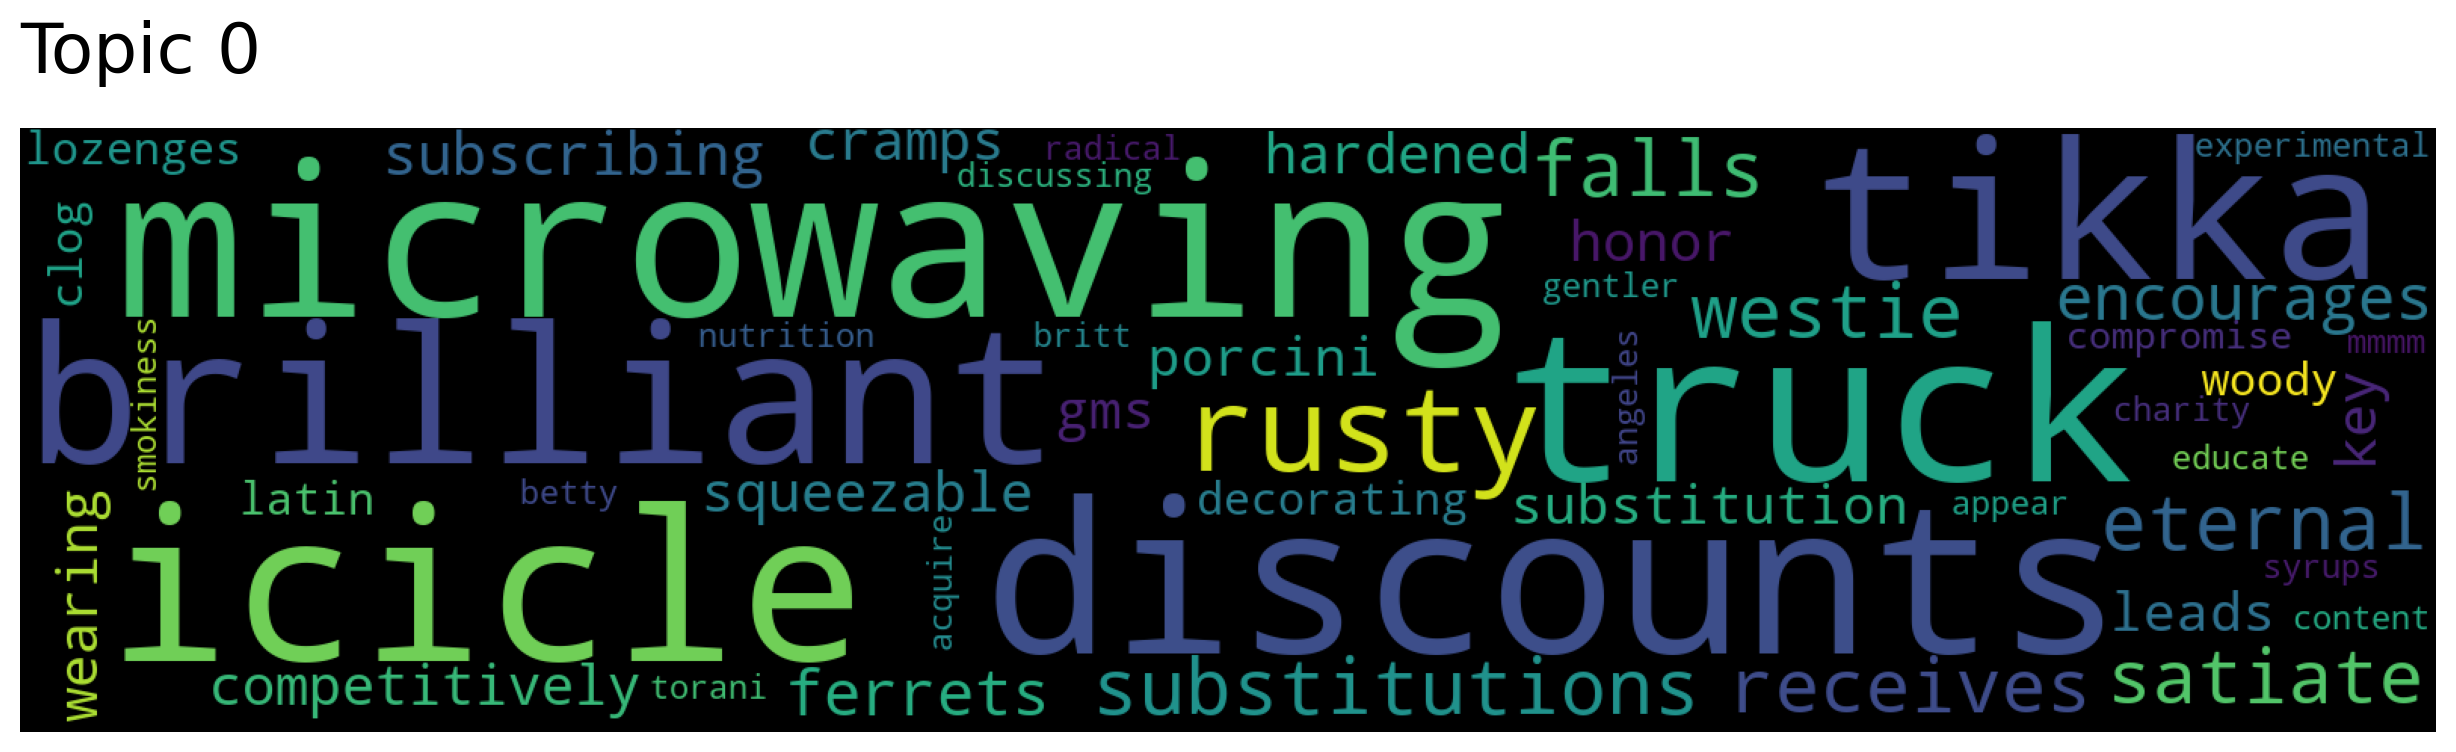

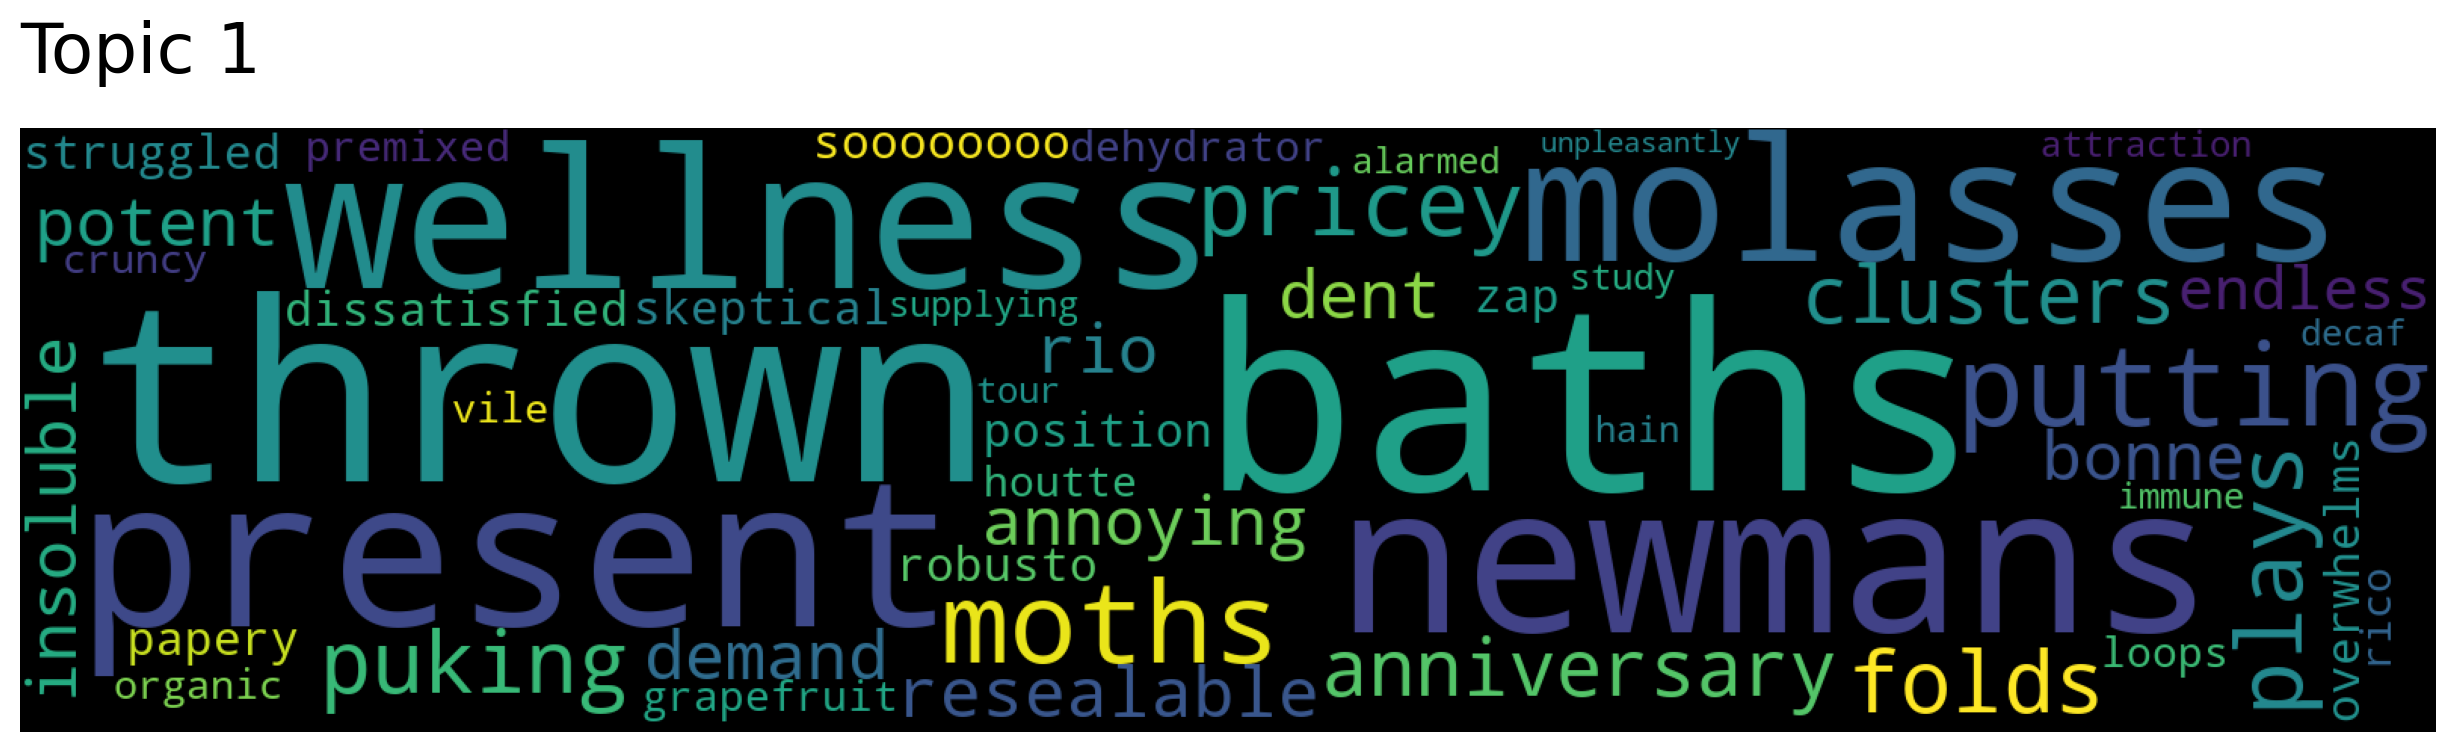

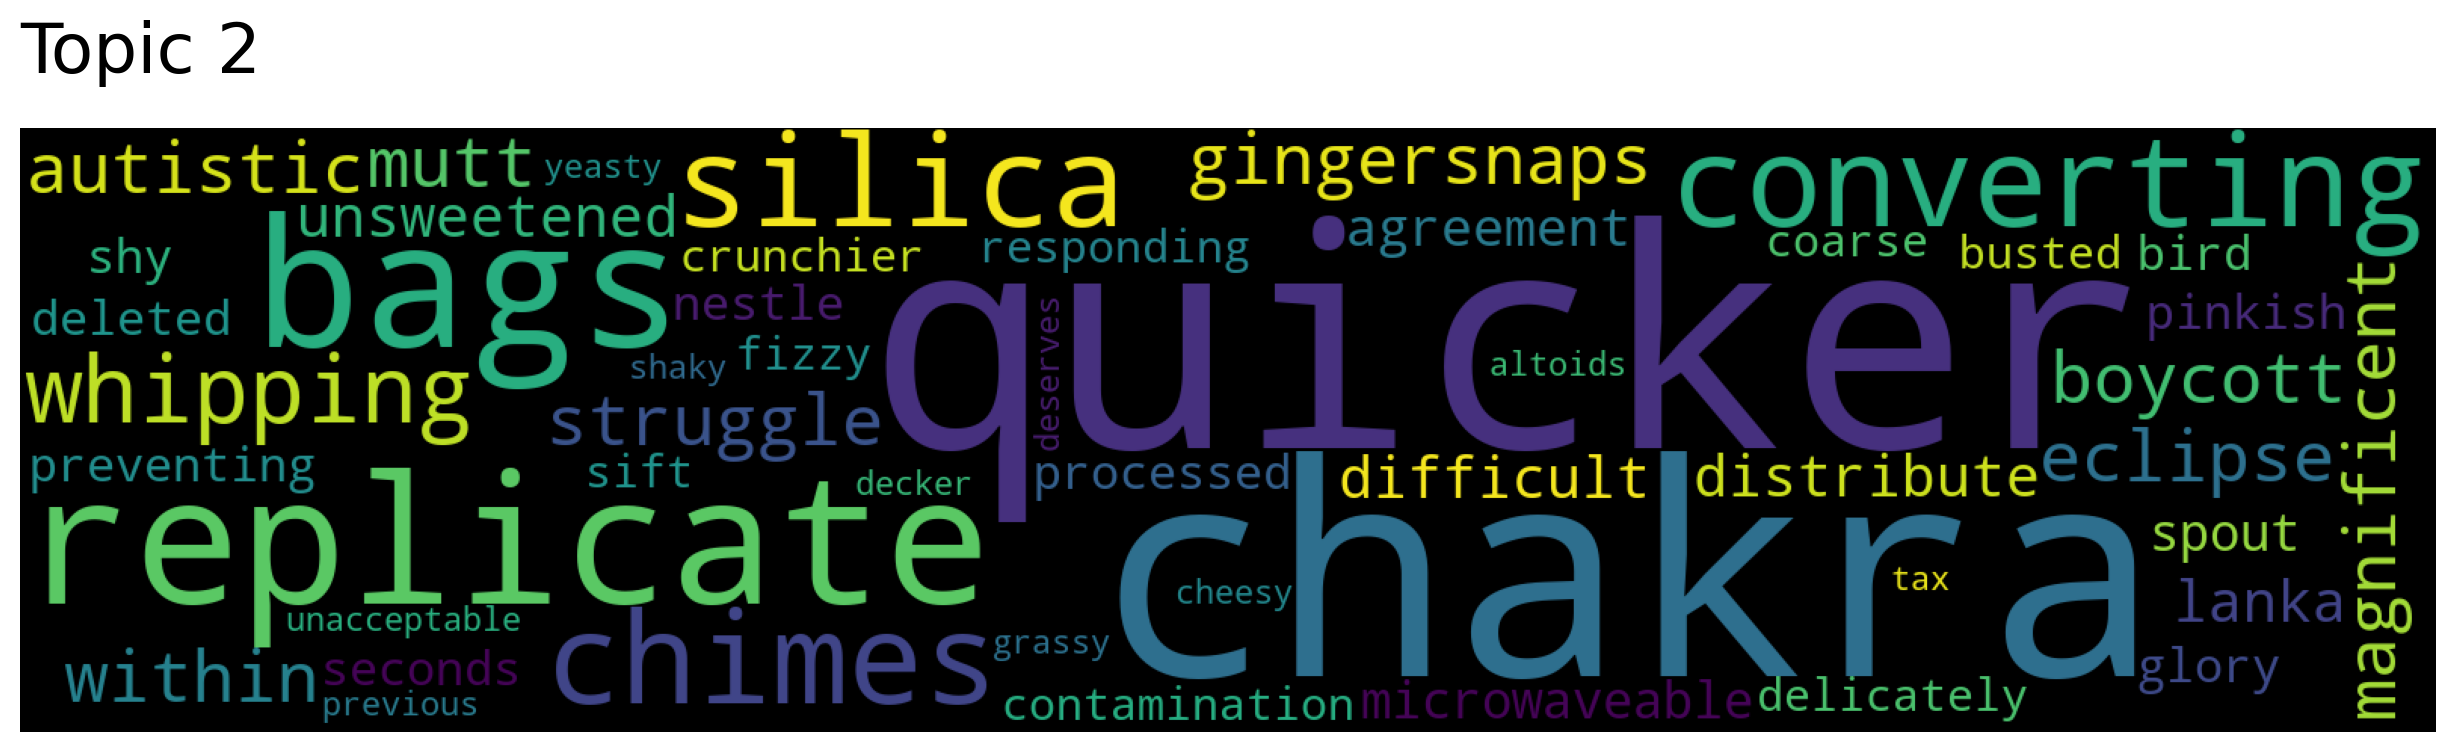

In [56]:
for topic in range(deep_model.get_num_topics()):
    model.generate_topic_wordcloud(topic)

In [29]:
 documents, document_scores, document_ids = deep_model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 332456, Score: 0.2710922658443451
-----------
Although nothing is better than freshly baked real Graubrot, Vollkornbrot, etc., Mestemacher's products are a great alternative for those who don't have access to a bakery that sells the real thing.<br /><br />The box of twelve loaves arrived well-packed an on time - as promised. I will certainly consider buying again from this supplier.<br /><br />Guten Appetit!
-----------

Document: 370679, Score: 0.2566044330596924
-----------
don't see how this is listed, with several other similar products from the same company, as "prepared meal"; you don't have milk or yogurt, no go; to me, that definition is met by, for instance, some of the pad thai nuker boxes; open noodle package, sauce package, combine in box, nuke 2min and ready to eat;  what this amounts to is a company selling a very small amount of pasta that's wildly overpriced compared to a standard box in the s'market- and still needs to be cooked the same way, no nuking short 

In [33]:
documents, document_scores, document_ids = deep_model.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 505436, Score: 0.32281026244163513
-----------
I purchased the Chicken & Salmon formula with the notion that- Hey! I watch what I eat, My kitty should too! Needless to say, my cat Mia was less than thrilled. In fact, she took two wiffs and walked away :( Granted I was feeding her Fancy Feast before- which I recently found out is like feeding your cat Mcdonald's every day! Super tasty but void of any nutritional benefits whats-soever... So after a few unsuccessful meal times, I tried spiking her meal with a dash of Fancy Feast? No dice. She ate the Fancy Feast and I swear gave me this look like- 'Nice Try Bucco- and you thought you were SOOO sneaky...'<br /><br />So to the previous Fancy Feast feeders- I say maybe try something else to slowly get your cat onto the health track? Or you might end up like me with 20 cans of food I can't use :( I've been trying other brands that have more gravy- with slightly more success! (Emphasis on the slightly-she drinks up all the liquid and

## How to Use Bertopic for Topic Modeling and Content Analysis?

**BERTopic** is a topic clustering and modeling technique that uses Latent Dirichlet Allocation. 

* BERTopic is a topic modeling technique that leverages 🤗 transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

* Bertopic can be used to visualize topical clusters and topical distances for news articles, tweets, or blog posts.

* BERTopic can be used with spacy, genism, flair, and use libraries for NLP from Python programming language

## Installation of Bertopic

To install the different language backend technologies and transformers, you can use different install commands.

* To use “Bertopic” with flair, use the “pip install bertopic[flair]” command.
* To use “Bertopic” with spacy, use the “pip install bertopic[genism] command.
* To use “Bertopic” with spacy, use the “pip install bertopic[spacy]” command.
* To use “Bertopic” with “use”, use the “pip install bertopic[use]” command.
* To use all of them with “Bertopic”, use the “pip install bertopic[all]” command.

In [ ]:
!pip install --quiet bertopic

In [ ]:
!pip install bertopic[visualization]

## Document Fitting and Transforming with Bertopic

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(nr_topics="auto")

In [ ]:
topics, probs  = topic_model.fit_transform(docs)

## After generating topics and their probabilities, we can access the frequent topics that were generated:

In [ ]:
topic_model.get_topic_info()

Topic   Count                                               Name
0        -1  206867                     -1_soup_chocolate_beans_cereal
1         0    2791               0_sugar_diabetic_sweetener_diabetics
2         1    2546                       1_oatmeal_oats_steel_mccanns
3         2    2426                   2_noodles_ramen_noodle_shirataki
4         3    2314                     3_crackers_cracker_ritz_cheese
...     ...     ...                                                ...
6400   6482      10                  6482_cora_everlasting_ball_pluggy
6399   6483      10        6483_gloveboxin_rightyou_briefcase_mesquite
6398   6484      10             6484_pastry_passover_temptedthis_easly
6397   6425      10  6425_httpwwwamazoncomgpproductb004qqa4kkrefcmc...
6486   6485      10       6485_ragu_gelsons_recommendeddont_brokenseal

[6487 rows x 3 columns]

* -1 refers to all outliers and should typically be ignored

In [ ]:
topic_model.get_topic_freq().head()

Topic   Count
0     -1  206867
1      0    2791
2      1    2546
3      2    2426
4      3    2314

## Look at the most frequent topic that was generated, topic 0:

In [ ]:
topic_model.get_topic(0)

[('sugar', 0.002965353336955086),
 ('diabetic', 0.002414983520031128),
 ('sweetener', 0.0018751207517674982),
 ('diabetics', 0.0015265967806225782),
 ('sweetner', 0.0014975977133120217),
 ('sweeteners', 0.001425842338807467),
 ('muscovado', 0.001341422113655515),
 ('cane', 0.0013027920295600652),
 ('substitutes', 0.0012733973607360395),
 ('baking', 0.001222280136243824)]

## Look at the most frequent topic that was generated, topic 1:

In [ ]:
topic_model.get_topic(1)

[('oatmeal', 0.010027283656598211),
 ('oats', 0.008881407046065132),
 ('steel', 0.0066240628258579055),
 ('mccanns', 0.006053069784729903),
 ('quaker', 0.0038572920478322902),
 ('rolled', 0.003100916263009722),
 ('steelcut', 0.0024100762188996225),
 ('cut', 0.0019866503290755276),
 ('porridge', 0.0018810643783193953),
 ('instant', 0.0018380011582563457)]

## Topic Reduction after Training

In [ ]:
new_topics, new_probs = topic_model.reduce_topics(docs, topics, probs, nr_topics=10)

Using the code above, we reduce the number of topics to 10 after having trained the model

In [ ]:
topic_model.get_topic_info()

Topic   Count                   Name
0      -1  489571       -1_the_and_to_it
1       0   14014    0_coffee_the_is_and
2       1    9766     1_sauce_the_and_of
3       2    9494    2_chips_the_are_and
4       3    7801     3_sugar_the_it_and
5       4    7753      4_oil_hair_it_and
6       5    7511        5_the_to_dog_it
7       6    6682        6_and_the_it_to
8       7    5447  7_coffee_the_pods_pod
9       8    5401    8_candy_the_and_was
10      9    5014     9_bread_the_it_and

In [ ]:
topic_model.get_topic(1)

[('sauce', 0.051816885904277854),
 ('the', 0.04777860404469674),
 ('and', 0.03902195243256824),
 ('of', 0.03538847470654363),
 ('it', 0.034950988274249715),
 ('hot', 0.034879937277964845),
 ('to', 0.03468564188303463),
 ('is', 0.032105815930869294),
 ('this', 0.03014881368606449),
 ('chips', 0.030017528292945347)]

## Topic Representation

Topics are typically represented by a set of words. In BERTopic, these words are extracted from the documents using a class-based TF-IDF.

At times, you might not be happy with the representation of the topics that were created. This is possible when you selected to have only 1-gram words as representation. Perhaps you want to try out a different n-gram range or you have a custom vectorizer that you want to use.


To update the topic representation after training, we can use the function update_topics to update the topic representation with new parameters for c-TF-IDF:

In [ ]:
# Update topic representation by increasing n-gram range and removing english stopwords
bigram_topics, bigram_probs =topic_model.update_topics(docs, topics, n_gram_range=(1, 3))

In [ ]:
_